In [1]:
# Importing libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## 1. Data Exploration

#### Dataset

In [2]:
# Set the directory paths for the dataset
train_dir = "chest_xray/train/"
test_dir = "chest_xray/test/"
val_dir = "chest_xray/val/"

In [3]:
# Explore distribution of the data
def explore_data(directory):
    categories = ["Normal", "Pneumonia"]
    for category in categories:
        path = os.path.join(directory, category)
        print(f"{category}: {len(os.listdir(path))} images")


explore_data(train_dir)

Normal: 1341 images
Pneumonia: 3875 images


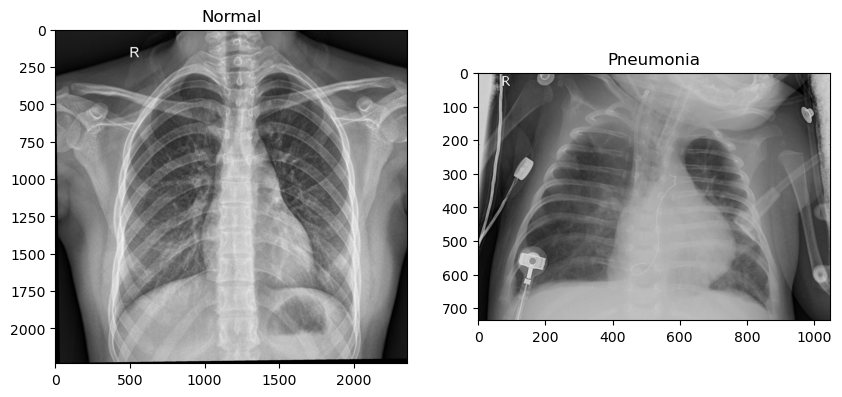

In [4]:
# Visualize sample images
def plot_sample_images(directory):
    categories = ["Normal", "Pneumonia"]
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    for i, category in enumerate(categories):
        path = os.path.join(directory, category)
        image_path = os.listdir(path)[0]
        img = plt.imread(os.path.join(path, image_path))
        axes[i].imshow(img, cmap='grey')
        axes[i].set_title(category)
    plt.show()

plot_sample_images(train_dir)

## 2. Preprocessing

In [5]:
# ImageDataGenerator for Augmentation and Normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    horizontal_flip=True,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

In [6]:
# Flow images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

test_generator  = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = False
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## 3. Model Development

### 3.1 Model Development with VGG16 Architecture

In [7]:
# Create a sequential model
model_vgg16 = Sequential()

In [8]:
# 1st Convolutional Block
# 1st Convolutional Layer
model_vgg16.add(Conv2D(filters=64, input_shape=(224,224,3), kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 2nd Convolutional Layer
model_vgg16.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# Max Pooling
model_vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 2nd Convolutional Block
# 3rd Convolutional Layer
model_vgg16.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 4th Convolutional Layer
model_vgg16.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# Max Pooling
model_vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 3rd Convolutional Block
# 5th Convolutional Layer
model_vgg16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 6th Convolutional Layer
model_vgg16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 7th Convolutional Layer
model_vgg16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# Max Pooling
model_vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 4th Convolutional Block
# 8th Convolutional Layer
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 9th Convolutional Layer
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 10th Convolutional Layer
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# Max Pooling
model_vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 5th Convolutional Block
# 11th Convolutional Layer
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 12th Convolutional Layer
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 13th Convolutional Layer
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# Max Pooling
model_vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Fully Connected Layers
# Flatten
model_vgg16.add(Flatten())
# FC1
model_vgg16.add(Dense(4096, activation='relu'))
model_vgg16.add(BatchNormalization())
# Adding DropOut to prevent Overfitting
model_vgg16.add(Dropout(0.5))
#FC2
model_vgg16.add(Dense(4096, activation='relu'))
model_vgg16.add(BatchNormalization())
# Adding DropOut to prevent Overfitting
model_vgg16.add(Dropout(0.5))
# Output Layer
model_vgg16.add(Dense(1, activation='sigmoid'))

2024-08-25 08:49:15.247459: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-08-25 08:49:15.247495: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-08-25 08:49:15.247505: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-08-25 08:49:15.247707: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-25 08:49:15.247734: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
# Display a summary of the model vgg16 architecture, including the number of parameters in each layer
model_vgg16.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 28, 28, 512)    │         2,04

 Total params: 134,314,305 (512.37 MB)

 Trainable params: 134,289,473 (512.27 MB)

 Non-trainable params: 24,832 (97.00 KB)

In [10]:
# Compile the Model
from tensorflow.keras.optimizers import Adam
model_vgg16.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Training VGG16 Architecture

In [11]:
history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch = 80,
    validation_data=val_generator,
    epochs=25
)

Epoch 1/25


2024-08-25 08:49:21.770533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


80/80 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.7698 - loss: 1.4300 - val_accuracy: 0.4375 - val_loss: 2.7631
Epoch 2/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.8902 - loss: 0.3169 - val_accuracy: 0.5000 - val_loss: 7.0323
Epoch 3/25
 3/80 ━━━━━━━━━━━━━━━━━━━━ 1:50 1s/step - accuracy: 0.9444 - loss: 0.1859

2024-08-25 08:53:26.363426: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-25 08:53:26.363465: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2529704197075137818
2024-08-25 08:53:26.363470: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8800939691697993252
2024-08-25 08:53:26.363473: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/Add_42/_210]]
2024-08-25 08:53:26.363487: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12221562941418277646
2024-08-25 08:53:26.363495: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 75671493

80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9277 - loss: 0.2589 - val_accuracy: 0.5000 - val_loss: 4.8153
Epoch 4/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.8902 - loss: 0.3340 - val_accuracy: 0.5000 - val_loss: 3.0686
Epoch 5/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.8944 - loss: 0.2831 - val_accuracy: 0.5000 - val_loss: 1.5608
Epoch 6/25
 3/80 ━━━━━━━━━━━━━━━━━━━━ 1:50 1s/step - accuracy: 0.8854 - loss: 0.3499

2024-08-25 08:57:25.459208: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-25 08:57:25.459224: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8826475232680329324
2024-08-25 08:57:25.459229: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13417923416626127180
2024-08-25 08:57:25.459233: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16251811839858155600
2024-08-25 08:57:25.459238: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10576095666157280890
2024-08-25 08:57:25.459244: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 26528531969878768
2024-08-25 08:57:25.459248: I tensorflow/core/framework/local_rendezvo

80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9055 - loss: 0.3025 - val_accuracy: 0.5625 - val_loss: 1.1877
Epoch 7/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.9024 - loss: 0.2517 - val_accuracy: 0.5000 - val_loss: 4.7852
Epoch 8/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9242 - loss: 0.2167 - val_accuracy: 0.5000 - val_loss: 1.2015
Epoch 9/25
 3/80 ━━━━━━━━━━━━━━━━━━━━ 1:51 1s/step - accuracy: 0.9531 - loss: 0.1350

2024-08-25 09:01:24.595280: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-25 09:01:24.595300: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16251811839858155600
2024-08-25 09:01:24.595305: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13417923416626127180
2024-08-25 09:01:24.595310: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7388300540262765418
2024-08-25 09:01:24.595314: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 132354487596774412
2024-08-25 09:01:24.595318: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8800939691697993252
2024-08-25 09:01:24.595322: I tensorflow/core/framework/local_rendezvo

80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9381 - loss: 0.1586 - val_accuracy: 0.5625 - val_loss: 1.1282
Epoch 10/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.9263 - loss: 0.2106 - val_accuracy: 0.5000 - val_loss: 1.9403
Epoch 11/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9225 - loss: 0.2305 - val_accuracy: 0.4375 - val_loss: 30.4056
Epoch 12/25
 3/80 ━━━━━━━━━━━━━━━━━━━━ 1:51 1s/step - accuracy: 0.8802 - loss: 0.2624

2024-08-25 09:05:23.717415: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-25 09:05:23.717433: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12221562941418277646
2024-08-25 09:05:23.717440: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/Add_10/_148]]
2024-08-25 09:05:23.717444: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13473600780284672671
2024-08-25 09:05:23.717448: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6390295204668032889
2024-08-25 09:05:23.717454: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7567149

80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9053 - loss: 0.2636 - val_accuracy: 0.4375 - val_loss: 30.6704
Epoch 13/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.9226 - loss: 0.1964 - val_accuracy: 0.5000 - val_loss: 3.6594
Epoch 14/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9306 - loss: 0.2095 - val_accuracy: 0.6875 - val_loss: 0.9173
Epoch 15/25
 3/80 ━━━━━━━━━━━━━━━━━━━━ 1:51 1s/step - accuracy: 0.9045 - loss: 0.1741

2024-08-25 09:09:22.946269: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-25 09:09:22.946287: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8826475232680329324
2024-08-25 09:09:22.946292: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 132354487596774412
2024-08-25 09:09:22.946296: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8800939691697993252
2024-08-25 09:09:22.946302: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12221562941418277646
2024-08-25 09:09:22.946307: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 153134440581348744
2024-08-25 09:09:22.946314: W tensorflow/core/framework/local_rendezvous

80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9162 - loss: 0.1512 - val_accuracy: 0.5625 - val_loss: 1.1897
Epoch 16/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.9243 - loss: 0.2103 - val_accuracy: 0.5000 - val_loss: 4.4994
Epoch 17/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9061 - loss: 0.2690 - val_accuracy: 0.4375 - val_loss: 18.7616
Epoch 18/25
 3/80 ━━━━━━━━━━━━━━━━━━━━ 1:51 1s/step - accuracy: 0.9062 - loss: 0.3105

2024-08-25 09:13:22.149441: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-25 09:13:22.149460: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8826475232680329324
2024-08-25 09:13:22.149466: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 132354487596774412
2024-08-25 09:13:22.149471: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8800939691697993252
2024-08-25 09:13:22.149477: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12221562941418277646
2024-08-25 09:13:22.149486: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7567149344195918932
2024-08-25 09:13:22.149490: I tensorflow/core/framework/local_rendezvou

80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9062 - loss: 0.2830 - val_accuracy: 0.5000 - val_loss: 26.6377
Epoch 19/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.9416 - loss: 0.1652 - val_accuracy: 0.5000 - val_loss: 2.2464
Epoch 20/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9272 - loss: 0.2169 - val_accuracy: 0.5000 - val_loss: 3.1214
Epoch 21/25
 3/80 ━━━━━━━━━━━━━━━━━━━━ 1:50 1s/step - accuracy: 0.9757 - loss: 0.0875

2024-08-25 09:17:21.534201: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-25 09:17:21.534219: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8826475232680329324
2024-08-25 09:17:21.534223: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13417923416626127180
2024-08-25 09:17:21.534236: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16251811839858155600
2024-08-25 09:17:21.534241: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7732508347172069036
2024-08-25 09:17:21.534245: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12221562941418277646
2024-08-25 09:17:21.534249: I tensorflow/core/framework/local_rendez

80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9590 - loss: 0.1161 - val_accuracy: 0.5000 - val_loss: 3.6856
Epoch 22/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.9284 - loss: 0.1994 - val_accuracy: 0.4375 - val_loss: 2.0462
Epoch 23/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9501 - loss: 0.1521 - val_accuracy: 0.5000 - val_loss: 5.4147
Epoch 24/25
 3/80 ━━━━━━━━━━━━━━━━━━━━ 1:52 1s/step - accuracy: 0.9635 - loss: 0.2265

2024-08-25 09:21:21.041141: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-25 09:21:21.041165: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8826475232680329324
2024-08-25 09:21:21.041178: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7460748956847321220
2024-08-25 09:21:21.041182: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 132354487596774412
2024-08-25 09:21:21.041186: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8800939691697993252
2024-08-25 09:21:21.041190: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4745861010872736006
2024-08-25 09:21:21.041194: I tensorflow/core/framework/local_rendezvous

80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9385 - loss: 0.3715 - val_accuracy: 0.5000 - val_loss: 4.5017
Epoch 25/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.9372 - loss: 0.1732 - val_accuracy: 0.5000 - val_loss: 5.3324


In [12]:
history_vgg16.history

{'accuracy': [0.8304687738418579,
  0.900390625,
  0.9270833134651184,
  0.89453125,
  0.90234375,
  0.90625,
  0.9117187261581421,
  0.916015625,
  0.9375,
  0.91796875,
  0.926953136920929,
  0.90625,
  0.9195312261581421,
  0.92578125,
  0.9166666865348816,
  0.9281250238418579,
  0.9273437261581421,
  0.90625,
  0.935546875,
  0.9253906011581421,
  0.9583333134651184,
  0.926953136920929,
  0.942187488079071,
  0.9375,
  0.9378906488418579],
 'loss': [0.8645812273025513,
  0.28698715567588806,
  0.26172253489494324,
  0.32818883657455444,
  0.2771172821521759,
  0.30064618587493896,
  0.2431585043668747,
  0.24804797768592834,
  0.1594778448343277,
  0.22628167271614075,
  0.21213313937187195,
  0.2636047899723053,
  0.22254078090190887,
  0.21765291690826416,
  0.1503523737192154,
  0.2098788470029831,
  0.21632440388202667,
  0.28193193674087524,
  0.18207457661628723,
  0.2114792764186859,
  0.11720120906829834,
  0.20035335421562195,
  0.184588223695755,
  0.37715432047843933,


#### Performance Graph of VGG16

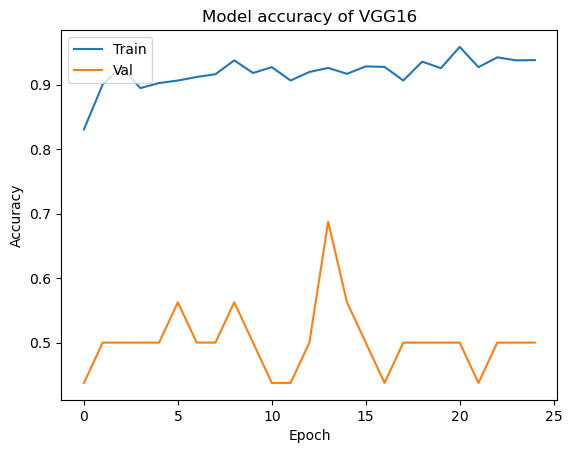

In [13]:
plt.plot(history_vgg16.history['accuracy'])  # Plot training accuracy
plt.plot(history_vgg16.history['val_accuracy'])  # Plot validation accuracy
plt.title('Model accuracy of VGG16')
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['Train', 'Val'], loc='upper left')  
plt.show()

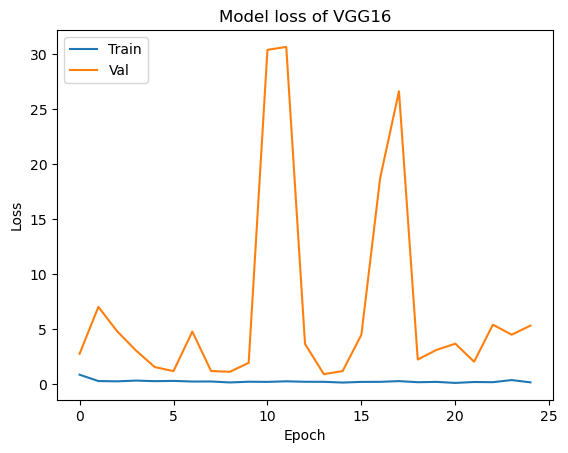

In [14]:
plt.plot(history_vgg16.history['loss'])  # Plot training loss
plt.plot(history_vgg16.history['val_loss'])  # Plot validation loss
plt.title('Model loss of VGG16')  
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show() 

#### Model Evaluation of VGG16

In [15]:
# Evaluate the model on the test set
test_loss, test_acc = model_vgg16.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 286ms/step - accuracy: 0.2984 - loss: 6.5207
Test Accuracy: 0.625
Test Loss: 3.4199531078338623


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 301ms/step


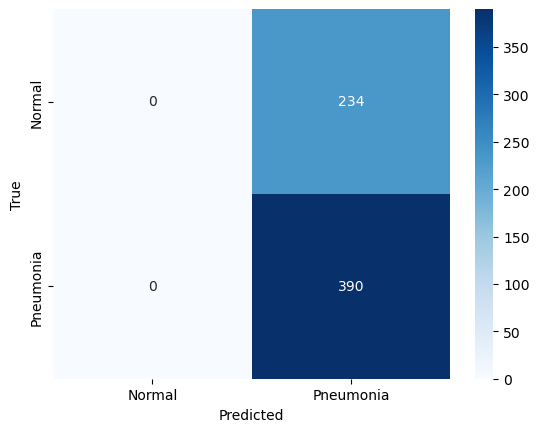

In [16]:
# Confusion Matrix
test_predictions = model_vgg16.predict(test_generator)
test_predictions = (test_predictions > 0.5).astype(int)

cm = confusion_matrix(test_generator.classes, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [17]:
# Classification Report
print(classification_report(test_generator.classes, test_predictions, target_names=['NORMAL', 'PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.00      0.00      0.00       234
   PNEUMONIA       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



### 3.2 Model Development with VGG19 Pre-Trained Architecture

In [18]:
from tensorflow.keras.applications import VGG19

In [19]:
# Load the VGG19 model
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [20]:
# Freeze the layers except the last block
for layer in vgg19_base.layers:
    layer.trainable = False

In [21]:
# Create a sequential model
model_vgg19 = Sequential()

In [22]:
# Add the VGG19 base model
model_vgg19.add(vgg19_base)
model_vgg19.add(Flatten())

# Fully connected layers
model_vgg19.add(Dense(4096, activation='relu'))
model_vgg19.add(BatchNormalization())
model_vgg19.add(Dropout(0.5))
model_vgg19.add(Dense(4096, activation='relu'))
model_vgg19.add(BatchNormalization())
model_vgg19.add(Dropout(0.5))
# Output layer
model_vgg19.add(Dense(1, activation='sigmoid'))

In [23]:
# Display a summary of the model vgg19 architecture
model_vgg19.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,607,105 (532.56 MB)

 Trainable params: 119,566,337 (456.11 MB)

 Non-trainable params: 20,040,768 (76.45 MB)

In [24]:
# Compile the model
model_vgg19.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Training VGG19 Model

In [25]:
# Train the model
history_vgg19 = model_vgg19.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 398ms/step - accuracy: 0.8340 - loss: 0.8821 - val_accuracy: 0.7500 - val_loss: 0.7369
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 397ms/step - accuracy: 0.9285 - loss: 0.2523 - val_accuracy: 0.9375 - val_loss: 0.1427
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 397ms/step - accuracy: 0.9333 - loss: 0.1907 - val_accuracy: 0.8125 - val_loss: 0.9788
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 397ms/step - accuracy: 0.9442 - loss: 0.1761 - val_accuracy: 0.6250 - val_loss: 0.6603
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 397ms/step - accuracy: 0.9370 - loss: 0.1807 - val_accuracy: 0.6875 - val_loss: 1.7530
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 397ms/step - accuracy: 0.9561 - loss: 0.1491 - val_accuracy: 0.9375 - val_loss: 0.1805
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 397ms/step - accuracy: 0.9566 - loss: 0.1349 - val_accuracy: 0.8750 - val_loss: 0.3158
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 397ms/step - accuracy: 0.9565 - loss: 0

In [26]:
history_vgg19.history

{'accuracy': [0.8861196041107178,
  0.9305981397628784,
  0.9394171833992004,
  0.9422929286956787,
  0.9424846768379211,
  0.9528374075889587,
  0.9530291557312012,
  0.9560966491699219,
  0.9606978297233582,
  0.9507285356521606,
  0.9528374075889587,
  0.9595475196838379,
  0.9618481397628784,
  0.9532208442687988,
  0.9574386477470398,
  0.9587806463241577,
  0.9580138325691223,
  0.9629984498023987,
  0.9637653231620789,
  0.9580138325691223,
  0.9585889577865601,
  0.962806761264801,
  0.9647239446640015,
  0.9622315764427185,
  0.9666411280632019],
 'loss': [0.51942378282547,
  0.23789387941360474,
  0.18207800388336182,
  0.1795072853565216,
  0.16501660645008087,
  0.14678435027599335,
  0.14993534982204437,
  0.1255592554807663,
  0.11841047555208206,
  0.18472805619239807,
  0.1433585286140442,
  0.12610284984111786,
  0.11280041933059692,
  0.13699783384799957,
  0.12789292633533478,
  0.12464757263660431,
  0.12131186574697495,
  0.10486024618148804,
  0.11140933632850647,

#### Performance Graph of VGG19

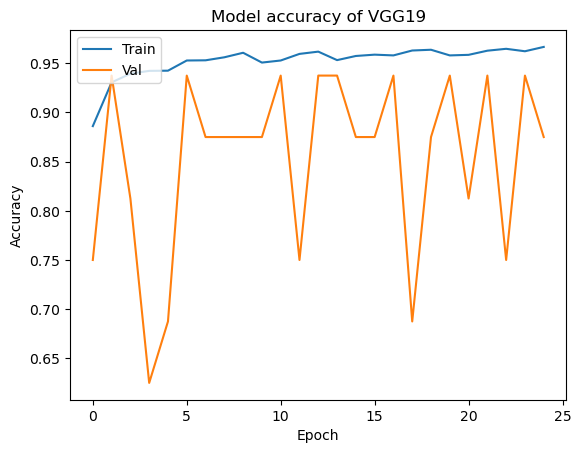

In [27]:
plt.plot(history_vgg19.history['accuracy'])  # Plot training accuracy
plt.plot(history_vgg19.history['val_accuracy'])  # Plot validation accuracy
plt.title('Model accuracy of VGG19')
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['Train', 'Val'], loc='upper left')  
plt.show()

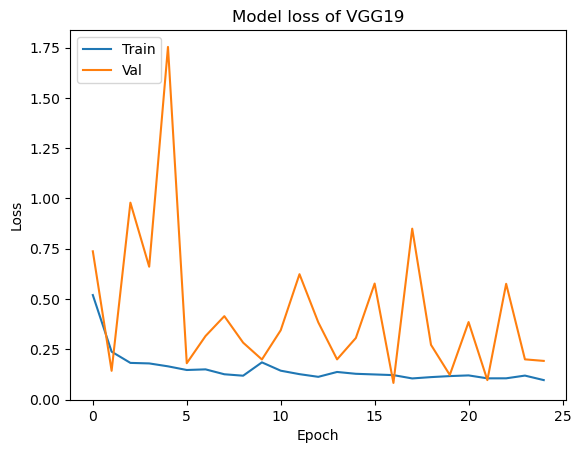

In [28]:
plt.plot(history_vgg19.history['loss'])  # Plot training loss
plt.plot(history_vgg19.history['val_loss'])  # Plot validation loss
plt.title('Model loss of VGG19')  
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

#### Model Evaluation of VGG19

In [29]:
# Evaluate the model on the test data
test_loss, test_acc = model_vgg19.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 298ms/step - accuracy: 0.8814 - loss: 0.4192
Test Accuracy: 0.9102563858032227
Test Loss: 0.31004223227500916


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 302ms/step


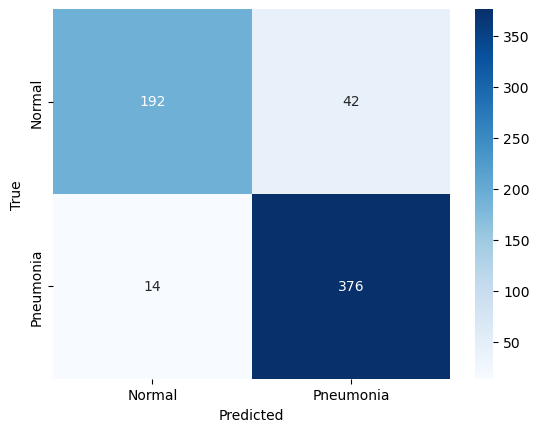

In [30]:
# Confusion Matrix
test_predictions = model_vgg19.predict(test_generator)
test_predictions = (test_predictions > 0.5).astype(int)

cm = confusion_matrix(test_generator.classes, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [31]:
# Classification Report
print(classification_report(test_generator.classes, test_predictions, target_names=['NORMAL', 'PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.93      0.82      0.87       234
   PNEUMONIA       0.90      0.96      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624



### 3.3 Model Development with ResNet50 Pre-Trained Architecture

In [32]:
from tensorflow.keras.applications import ResNet50

In [33]:
# Loading the ResNet50 model
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [34]:
# Freeze the ResNet50 base model layers
for layer in resnet_base.layers:
    layer.trainable = False

In [35]:
# Create a sequential model
model_resnet50 = Sequential()

In [36]:
# Add the ResNet50 base
model_resnet50.add(resnet_base)
model_resnet50.add(Flatten())
model_resnet50.add(Dense(1024, activation='relu'))
model_resnet50.add(BatchNormalization())
model_resnet50.add(Dropout(0.5))  
model_resnet50.add(Dense(512, activation='relu'))  
model_resnet50.add(BatchNormalization())
model_resnet50.add(Dropout(0.5))  

# Output layer
model_resnet50.add(Dense(1, activation='sigmoid'))  

In [37]:
# Display a summary of the model resnet50 architecture
model_resnet50.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │   102,761,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,880,641 (484.01 MB)

 Trainable params: 103,289,857 (394.02 MB)

 Non-trainable params: 23,590,784 (89.99 MB)

In [38]:
# Compile the model
model_resnet50.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Training ResNet50 Model

In [53]:
# Train the model
history_resnet50 = model_resnet50.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 363ms/step - accuracy: 0.9395 - loss: 0.1546 - val_accuracy: 0.6250 - val_loss: 1.6796
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 61s 362ms/step - accuracy: 0.9267 - loss: 0.1841 - val_accuracy: 0.8125 - val_loss: 0.3718
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 61s 360ms/step - accuracy: 0.9368 - loss: 0.1554 - val_accuracy: 0.5000 - val_loss: 2.7359
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 61s 361ms/step - accuracy: 0.9469 - loss: 0.1433 - val_accuracy: 0.6250 - val_loss: 1.1276
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 61s 362ms/step - accuracy: 0.9422 - loss: 0.1622 - val_accuracy: 0.6250 - val_loss: 1.7819
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 363ms/step - accuracy: 0.9440 - loss: 0.1463 - val_accuracy: 0.8750 - val_loss: 0.3584
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 61s 361ms/step - accuracy: 0.9419 - loss: 0.1516 - val_accuracy: 0.5625 - val_loss: 3.1303
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 61s 361ms/step - accuracy: 0.9451 - loss: 0

In [54]:
history_resnet50.history

{'accuracy': [0.9386503100395203,
  0.9309815764427185,
  0.9386503100395203,
  0.949386477470398,
  0.9438266754150391,
  0.9413343667984009,
  0.9424846768379211,
  0.9415260553359985,
  0.9445935487747192,
  0.9422929286956787,
  0.9457438588142395,
  0.9390337467193604,
  0.9447852969169617,
  0.9478527903556824,
  0.9468941688537598,
  0.9478527903556824,
  0.9428681135177612,
  0.9451687335968018,
  0.94804447889328,
  0.9534125924110413,
  0.94804447889328,
  0.9451687335968018,
  0.9484279155731201,
  0.9419094920158386,
  0.9490030407905579],
 'loss': [0.1496782898902893,
  0.17092952132225037,
  0.1558600813150406,
  0.14098486304283142,
  0.1520983725786209,
  0.14976686239242554,
  0.1519726663827896,
  0.1479710042476654,
  0.13759690523147583,
  0.15233294665813446,
  0.1392214298248291,
  0.1486767828464508,
  0.14133575558662415,
  0.1411210000514984,
  0.13386675715446472,
  0.14281216263771057,
  0.14435520768165588,
  0.14155523478984833,
  0.13915379345417023,
  0.1

#### Performance Graph of ResNet50

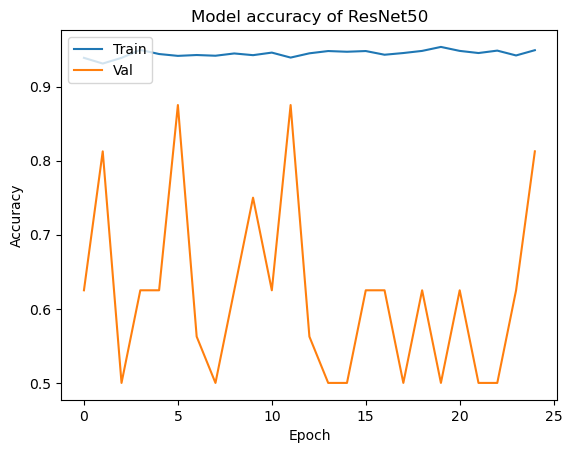

In [55]:
plt.plot(history_resnet50.history['accuracy'])  # Plot training accuracy
plt.plot(history_resnet50.history['val_accuracy'])  # Plot validation accuracy
plt.title('Model accuracy of ResNet50')
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['Train', 'Val'], loc='upper left')  
plt.show()

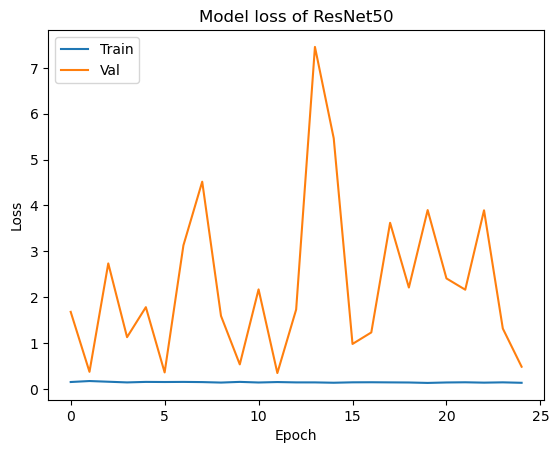

In [56]:
plt.plot(history_resnet50.history['loss'])  # Plot training loss
plt.plot(history_resnet50.history['val_loss'])  # Plot validation loss
plt.title('Model loss of ResNet50')  
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

#### Model Evaluation of ResNet50

In [57]:
# Evaluate the model on the test data
test_loss, test_acc = model_resnet50.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.8669 - loss: 0.4568
Test Accuracy: 0.8525640964508057
Test Loss: 0.5053150057792664


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step


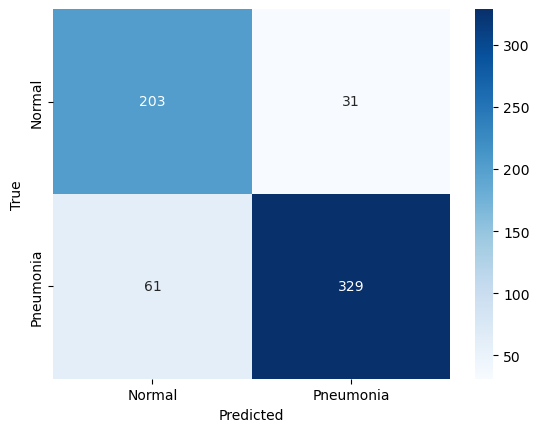

In [58]:
# Confusion Matrix
test_predictions = model_resnet50.predict(test_generator)
test_predictions = (test_predictions > 0.5).astype(int)

cm = confusion_matrix(test_generator.classes, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [59]:
# Classification Report
print(classification_report(test_generator.classes, test_predictions, target_names=['NORMAL', 'PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.77      0.87      0.82       234
   PNEUMONIA       0.91      0.84      0.88       390

    accuracy                           0.85       624
   macro avg       0.84      0.86      0.85       624
weighted avg       0.86      0.85      0.85       624



### 3.4 Model Development with InceptionV3 Pre-Trained Architecture

In [60]:
from tensorflow.keras.applications import InceptionV3

# Loading the InceptionV3 model
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [61]:
# Freeze the base layers of InceptionV3
for layer in inception_base.layers:
    layer.trainable = False

In [62]:
# Create a sequential model
model_inception = Sequential()

In [63]:
# Add the InceptionV3 base
model_inception.add(inception_base)

model_inception.add(Flatten())
model_inception.add(Dense(1024, activation='relu'))  
model_inception.add(BatchNormalization())
model_inception.add(Dropout(0.5)) 
model_inception.add(Dense(512, activation='relu'))  
model_inception.add(BatchNormalization())
model_inception.add(Dropout(0.5))  

# Output layer
model_inception.add(Dense(1, activation='sigmoid'))  

In [64]:
# Display a summary of the model InceptionV3 architecture
model_inception.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1024)           │    52,429,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_209         │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_210         │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,764,065 (285.20 MB)

 Trainable params: 52,958,209 (202.02 MB)

 Non-trainable params: 21,805,856 (83.18 MB)

In [65]:
# Compile the model
model_inception.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Training InceptionV3 Model

In [66]:
# Train the model
history_inception = model_inception.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 357ms/step - accuracy: 0.8232 - loss: 0.4990 - val_accuracy: 0.9375 - val_loss: 0.1414
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 331ms/step - accuracy: 0.9206 - loss: 0.2202 - val_accuracy: 0.8125 - val_loss: 0.5276
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 329ms/step - accuracy: 0.9248 - loss: 0.2053 - val_accuracy: 0.6875 - val_loss: 0.6886
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 329ms/step - accuracy: 0.9398 - loss: 0.1605 - val_accuracy: 0.8125 - val_loss: 0.5002
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 331ms/step - accuracy: 0.9401 - loss: 0.1573 - val_accuracy: 0.8125 - val_loss: 0.4706
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 331ms/step - accuracy: 0.9443 - loss: 0.1512 - val_accuracy: 0.6875 - val_loss: 0.9875
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 331ms/step - accuracy: 0.9467 - loss: 0.1484 - val_accuracy: 0.7500 - val_loss: 0.7404
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 330ms/step - accuracy: 0.9425 - loss: 0

In [67]:
history_inception.history

{'accuracy': [0.8684815764427185,
  0.9198619723320007,
  0.9311733245849609,
  0.9398006200790405,
  0.9390337467193604,
  0.9445935487747192,
  0.9468941688537598,
  0.9470859169960022,
  0.9514954090118408,
  0.9516870975494385,
  0.9572469592094421,
  0.9570552110671997,
  0.9518788456916809,
  0.9543711543083191,
  0.9537960290908813,
  0.9566717743873596,
  0.9543711543083191,
  0.9545629024505615,
  0.9562883377075195,
  0.9631901979446411,
  0.9605061411857605,
  0.9559049010276794,
  0.9574386477470398,
  0.9629984498023987,
  0.9631901979446411],
 'loss': [0.37197747826576233,
  0.22373048961162567,
  0.18998540937900543,
  0.16703277826309204,
  0.16921043395996094,
  0.14814196527004242,
  0.140603169798851,
  0.14106231927871704,
  0.1302991807460785,
  0.13249778747558594,
  0.11464408040046692,
  0.12117793411016464,
  0.12713205814361572,
  0.12025581300258636,
  0.11870849132537842,
  0.1097712591290474,
  0.1201539859175682,
  0.1128632128238678,
  0.11130688339471817

#### Performance Graph of InceptionV3

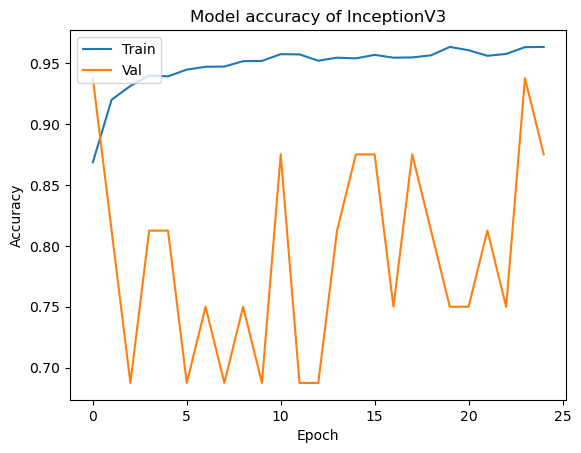

In [68]:
plt.plot(history_inception.history['accuracy'])  # Plot training accuracy
plt.plot(history_inception.history['val_accuracy'])  # Plot validation accuracy
plt.title('Model accuracy of InceptionV3')
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['Train', 'Val'], loc='upper left')  
plt.show()

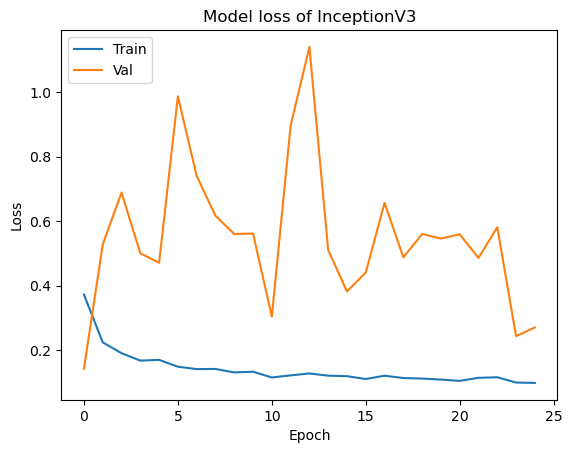

In [69]:
plt.plot(history_inception.history['loss'])  # Plot training loss
plt.plot(history_inception.history['val_loss'])  # Plot validation loss
plt.title('Model loss of InceptionV3')  
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

#### Model Evaluation of InceptionV3

In [70]:
# Evaluate the model on the test data
test_loss, test_acc = model_inception.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.7450 - loss: 0.7237
Test Accuracy: 0.8509615659713745
Test Loss: 0.4236687421798706


20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 464ms/step


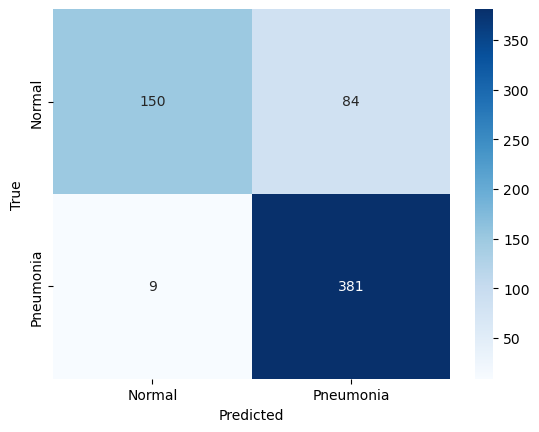

In [71]:
# Confusion Matrix
test_predictions = model_inception.predict(test_generator)
test_predictions = (test_predictions > 0.5).astype(int)

cm = confusion_matrix(test_generator.classes, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [72]:
# Classification Report
print(classification_report(test_generator.classes, test_predictions, target_names=['NORMAL', 'PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.94      0.64      0.76       234
   PNEUMONIA       0.82      0.98      0.89       390

    accuracy                           0.85       624
   macro avg       0.88      0.81      0.83       624
weighted avg       0.87      0.85      0.84       624



## 4. Model Evaluation On Validation Data

In [73]:
# Evaluating all the model on the validation data to select the ideal model for testing.

vgg16_acc = model_vgg16.evaluate(val_generator)[1]
vgg19_acc = model_vgg19.evaluate(val_generator)[1]
resnet50_acc = model_resnet50.evaluate(val_generator)[1]
inceptionv3_acc = model_inception.evaluate(val_generator)[1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.5000 - loss: 5.3324
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.8750 - loss: 0.1920
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.8125 - loss: 0.4830
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.8750 - loss: 0.2699


In [74]:
print(f"VGG16 Validation Accuracy: {vgg16_acc:.4f}")
print(f"VGG19 Validation Accuracy: {vgg19_acc:.4f}")
print(f"ResNet50 Validation Accuracy: {resnet50_acc:.4f}")
print(f"InceptionV3 Validation Accuracy: {inceptionv3_acc:.4f}")

VGG16 Validation Accuracy: 0.5000
VGG19 Validation Accuracy: 0.8750
ResNet50 Validation Accuracy: 0.8125
InceptionV3 Validation Accuracy: 0.8750


**InceptionV3 shows the highest validation accuracy (0.8750), making it the most promising candidate for testing.**

## 5. Testing

In [75]:
# Load and preprocess the image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

#### Normal Image

In [76]:
image_path = r"/Users/bhushannimje/Documents/Company/Scifor Technologies/Major Project/Pneumonia Detection from Chest X-Rays Using Deep Learning/chest_xray/test/NORMAL/IM-0016-0001.jpeg" 
img = load_img(image_path, target_size=(224, 224))

In [77]:
# Convert to array and normalize pixel values
img = img_to_array(img)
img = img / 255.0  
img = np.expand_dims(img, axis=0)

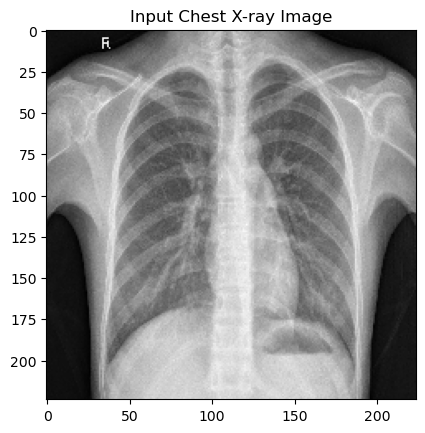

In [78]:
# Show the preprocessed image
plt.imshow(np.uint8(img[0] * 255))  # Convert back to [0, 255] range for display
plt.title('Input Chest X-ray Image')
plt.show()

In [79]:
# Make a prediction
rslt = model_inception.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


In [80]:
# Interpreting the result
# Assuming the model outputs 0 for NORMAL and 1 for PNEUMONIA
if rslt[0][0] > 0.5:
    prediction = "PNEUMONIA"
else:
    prediction = "NORMAL"

# Print the prediction
print(f"Prediction: {prediction}")

# Probability score
print(f"Model Output (Probability): {rslt[0][0]}")

Prediction: NORMAL
Model Output (Probability): 0.2917604148387909


#### Pneumonia Image

In [81]:
image_path = r"/Users/bhushannimje/Documents/Company/Scifor Technologies/Major Project/Pneumonia Detection from Chest X-Rays Using Deep Learning/chest_xray/test/PNEUMONIA/person1_virus_9.jpeg"
img = load_img(image_path, target_size=(224, 224))

In [82]:
# Convert to array and normalize pixel values
img = img_to_array(img)
img = img / 255.0  
img = np.expand_dims(img, axis=0)

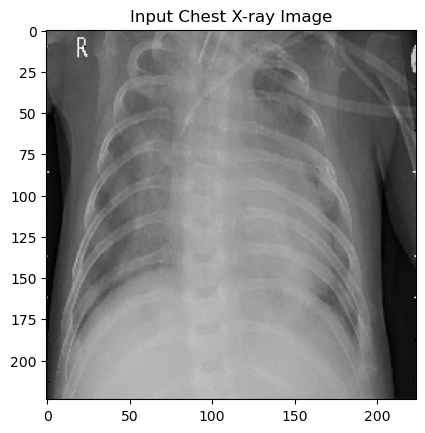

In [83]:
# Show the preprocessed image
plt.imshow(np.uint8(img[0] * 255))  # Convert back to [0, 255] range for display
plt.title('Input Chest X-ray Image')
plt.show()

In [84]:
# Make a prediction
rslt = model_inception.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [85]:
# Interpreting the result
# Assuming the model outputs 0 for NORMAL and 1 for PNEUMONIA
if rslt[0][0] > 0.5:
    prediction = "PNEUMONIA"
else:
    prediction = "NORMAL"

# Print the prediction
print(f"Prediction: {prediction}")

# Probability score
print(f"Model Output (Probability): {rslt[0][0]}")

Prediction: PNEUMONIA
Model Output (Probability): 0.9999926090240479


## 6. Saving the Model

In [86]:
model_inception.save("Pneumonia Detection.keras")

In [87]:
# Load the model
model = keras.models.load_model("Pneumonia Detection.keras")

In [88]:
image_path = r"/Users/bhushannimje/Documents/Company/Scifor Technologies/Major Project/Pneumonia Detection from Chest X-Rays Using Deep Learning/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg"
img = load_img(image_path, target_size=(224, 224))

In [89]:
# Convert to array and normalize pixel values
img = img_to_array(img)
img = img / 255.0  
img = np.expand_dims(img, axis=0)

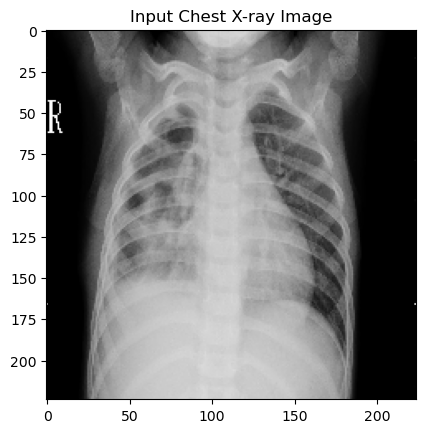

In [90]:
# Show the preprocessed image
plt.imshow(np.uint8(img[0] * 255))  # Convert back to [0, 255] range for display
plt.title('Input Chest X-ray Image')
plt.show()

In [91]:
# Make a prediction
rslt = model_inception.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


In [92]:
# Interpreting the result
# Assuming the model outputs 0 for NORMAL and 1 for PNEUMONIA
if rslt[0][0] > 0.5:
    prediction = "PNEUMONIA"
else:
    prediction = "NORMAL"

# Print the prediction
print(f"Prediction: {prediction}")

# Probability score
print(f"Model Output (Probability): {rslt[0][0]}")

Prediction: PNEUMONIA
Model Output (Probability): 0.9904676079750061
